Data Preparation

In [24]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
import joblib

base_dir = r'E:\FCI\4th year\1\Machine Learning\Machine Learning\Final Project\Handwritten-Digit-Recognition-Using-Machine-Learning-Techniques\10000\10000'

filepaths = []
labels = []
data = []

classlist = os.listdir(base_dir)
class_index = 0

for klass in classlist:
    classpath = os.path.join(base_dir, klass)
    flist = os.listdir(classpath)
    
    for f in flist:
        fpath = os.path.join(classpath, f)
        filepaths.append(fpath)
        labels.append(class_index)
  
        with Image.open(fpath) as img:
            img = img.convert('L') 
            img_resized = img.resize((28, 28))  
            img_array = np.array(img_resized).flatten()  
            img_array = img_array / 255.0  
            data.append(img_array)
    
    class_index += 1


data = np.array(data)
labels = np.array(labels)

data_df = pd.DataFrame(data) 
data_df['label'] = labels  

labels_categorical = to_categorical(labels)

In [15]:
print(data_df.dtypes)


0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
780      float64
781      float64
782      float64
783      float64
label      int32
Length: 785, dtype: object


Save Data Frame As csv file 

In [12]:
data_df.to_csv('mnist_dataset.csv')

print("Dataset saved as 'mnist_dataset.csv'")

Dataset saved as 'mnist_dataset.csv'


In [16]:
# num_samples = 5
# """Display random samples of images from the dataset."""
# plt.figure(figsize=(10, 2))
# indices = np.random.choice(len(X_features), num_samples, replace=False)
# for i, idx in enumerate(indices):
#     plt.subplot(1, num_samples, i + 1)
#     plt.imshow(X_features[idx].reshape(28, 28), cmap='gray')
#     plt.title(f"Label: {y_labels[idx]}")
#     plt.axis('off')
# plt.show()

In [19]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.627451,0.658824,0.654902,0.627451,0.635294,0.647059,0.639216,0.635294,0.647059,0.654902,...,0.647059,0.615686,0.607843,0.658824,0.686275,0.662745,0.639216,0.603922,0.635294,0
1,0.549020,0.470588,0.243137,0.101961,0.211765,0.415686,0.533333,0.600000,0.709804,0.678431,...,0.678431,0.690196,0.698039,0.682353,0.670588,0.678431,0.678431,0.658824,0.674510,0
2,0.686275,0.682353,0.674510,0.674510,0.674510,0.674510,0.682353,0.682353,0.678431,0.678431,...,0.486275,0.419608,0.517647,0.666667,0.670588,0.474510,0.486275,0.584314,0.615686,0
3,0.741176,0.717647,0.741176,0.764706,0.725490,0.658824,0.650980,0.682353,0.662745,0.690196,...,0.498039,0.549020,0.623529,0.709804,0.737255,0.627451,0.388235,0.129412,0.000000,0
4,0.435294,0.262745,0.113725,0.286275,0.443137,0.454902,0.454902,0.450980,0.454902,0.443137,...,0.458824,0.462745,0.466667,0.470588,0.470588,0.466667,0.458824,0.466667,0.478431,0


In [21]:
data_df['label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: label
Non-Null Count  Dtype
--------------  -----
10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [23]:
data_df['label'].head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training data shape: (8000, 784)
Training labels shape: (8000,)
Testing data shape: (2000, 784)
Testing labels shape: (2000,)


In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Linear Regression with OvR Approach 

In [36]:
linear_model = OneVsRestClassifier(LinearRegression())

Evaluating Linear Regression (OvR)...
Accuracy: 0.6575
Precision: 0.6588
Recall: 0.6575
F1-Score: 0.6555
Confusion Matrix:
[[160   3   4  11  10   9   3   1   1   6]
 [  3 153  12   2  10   4   7   9   1   1]
 [  2   7 137  12   5   5   5   4   5  10]
 [  8   6   9 149   5   7   0   7   3   7]
 [  2  16   3   1 128  10  15   4  16  14]
 [ 10   8   3   7   5 110  14   9  10  10]
 [  8   6   3   1   8  19 159   2   4   1]
 [  2  15   7   9   6   4   2 115   7  37]
 [  5   9   6  23  17  17  14  11 100  10]
 [  4   4  10  10  10   6   3  20   4 104]]
Time needed for Evaluating Linear Regression (OvR) model: 14.2097


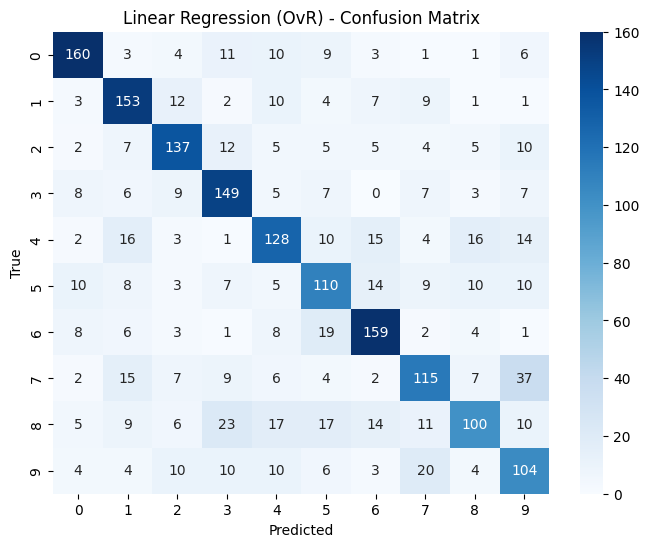

Saved linear regression model to linear_regression_(ovr).pkl


In [64]:
import time


print(f"Evaluating Linear Regression (OvR)...")

start_time = time.time()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
end_time = time.time() 

Training_time_of_lr = end_time - start_time

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Time needed for Evaluating Linear Regression (OvR) model: {Training_time_of_lr:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Regression (OvR) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

model_file = f"linear_regression_(ovr).pkl"
joblib.dump(linear_model, model_file)
print(f"Saved linear regression model to {model_file}")


Logistic Regression Model Using Grid Search for Hyperparameter Tuning

In [38]:
logistic_model = LogisticRegression()

In [39]:
param_grid = {
    'C': [0.1, 1, 10],  # Reduced regularization range for efficiency
    'solver': ['lbfgs'],
    'multi_class': ['multinomial'],  # Multi-class classification setup
    'max_iter': [200,300,500],  # Limited to 200 iterations for efficiency
}

In [41]:
logistic_model = LogisticRegression()
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, np.argmax(y_train, axis=1))
print("Best Parameters for Logistic Regression:", grid_search.best_params_)
best_logistic_model = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 300, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


Evaluating Logistic Regression...


c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7580
Precision: 0.7581
Recall: 0.7580
F1-Score: 0.7573
Confusion Matrix:
[[168   1   4   4   9   9   3   1   2   7]
 [  1 165   8   3   7   3   2   8   4   1]
 [  1   5 156   6   3   8   1   6   3   3]
 [  4   2   6 161   1   3   2   9   5   8]
 [  4   5   5   1 152   3   3   5  18  13]
 [ 10   6   4   6   2 130  11   5   9   3]
 [  3   6   1   0   3  14 183   0   1   0]
 [  3   9   8   6   3   1   1 142   4  27]
 [  6   3   5   8  17  16  12   9 130   6]
 [  7   3   5   5   7   2   0  12   5 129]]
Time needed for Evaluating Logistic Regression model: 4.8702


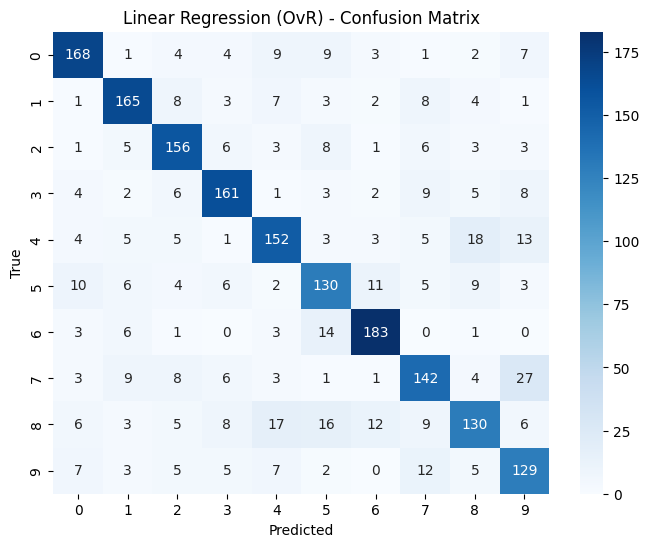

Saved Logistic Regression model to logistic_regression.pkl


In [67]:
print(f"Evaluating Logistic Regression...")

start_time = time.time()
best_logistic_model.fit(X_train,y_train)
predictions = best_logistic_model.predict(X_test)
end_time = time.time()

Training_time_of_lg = end_time - start_time


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Time needed for Evaluating Logistic Regression model: {Training_time_of_lg:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Regression (OvR) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

model_file = f"logistic_regression.pkl"
joblib.dump(best_logistic_model, model_file)
print(f"Saved Logistic Regression model to {model_file}")

Naive Bayes Classifier

In [45]:
naive_bayes_model = GaussianNB()

Evaluating Naive Bayes...
Accuracy: 0.4995
Precision: 0.5312
Recall: 0.4995
F1-Score: 0.5028
Confusion Matrix:
[[112  26   3  10  25  17   6   1   3   5]
 [  4 136   4  13   9   4   3  15  12   2]
 [  7  38  91  17   8   1   2   5  22   1]
 [ 10  23   7 135   6   1   0   8   6   5]
 [ 27  33   9   5  84   2   5   9  28   7]
 [ 16  30   3   4  12  79  18   2  18   4]
 [ 12  35   0   2   9  23 121   2   7   0]
 [  9  31   8  15  15   4   1  86  16  19]
 [ 11  34   8  20  20  10  10   7  87   5]
 [ 12  26   3  16  17   2   0  17  14  68]]
Time needed for Evaluating Naive Bayes model: 0.4104


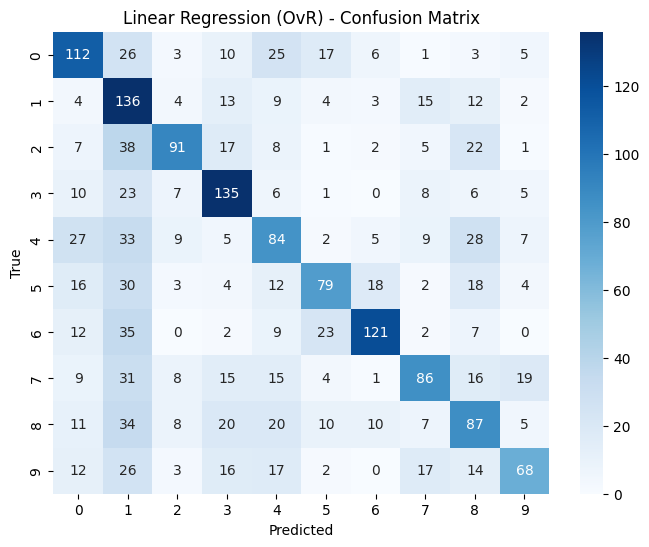

Saved Naive Bayes model to naive_bayes.pkl


In [68]:
print(f"Evaluating Naive Bayes...")

start_time = time.time()
naive_bayes_model.fit(X_train,y_train)
predictions = naive_bayes_model.predict(X_test)
end_time = time.time() 

Training_time_of_nb = end_time - start_time

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Time needed for Evaluating Naive Bayes model: {Training_time_of_nb:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Regression (OvR) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

model_file = f"naive_bayes.pkl"
joblib.dump(naive_bayes_model, model_file)
print(f"Saved Naive Bayes model to {model_file}")

In [54]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Linear Regression with cross validation splitting method 

In [62]:
from sklearn.model_selection import cross_validate

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1_score': 'f1_macro'
}

cv_results = cross_validate(
    estimator=linear_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring=scoring_metrics,
    return_train_score=False
)

print("mean and standard deviation of performance metrics for Linear Regression (OvR):")
print('\n')
print("***********************************************************")
print("\n")

print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean Precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Mean Recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1_score']):.4f}")

print('----------------------------------------------------------')

print(f"STD Accuracy: {np.std(cv_results['test_accuracy']):.4f}")
print(f"STD Precision: {np.std(cv_results['test_precision']):.4f}")
print(f"STD Recall: {np.std(cv_results['test_recall']):.4f}")
print(f"STD F1 Score: {np.std(cv_results['test_f1_score']):.4f}")


mean and standard deviation of performance metrics for Linear Regression (OvR):


***********************************************************


Mean Accuracy: 0.6432
Mean Precision: 0.6441
Mean Recall: 0.6449
Mean F1 Score: 0.6411
----------------------------------------------------------
STD Accuracy: 0.0090
STD Precision: 0.0107
STD Recall: 0.0099
STD F1 Score: 0.0101


logistic regression with cross validaion method 

In [56]:
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1_score': 'f1_macro'
}

cv_results = cross_validate(
    estimator=best_logistic_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring=scoring_metrics,
    return_train_score=False
)

print("mean and standard deviation of performance metrics for Logistic Regression Model :")
print('\n')
print("***********************************************************")
print("\n")

print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean Precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Mean Recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1_score']):.4f}")

print('----------------------------------------------------------')

print(f"STD Accuracy: {np.std(cv_results['test_accuracy']):.4f}")
print(f"STD Precision: {np.std(cv_results['test_precision']):.4f}")
print(f"STD Recall: {np.std(cv_results['test_recall']):.4f}")
print(f"STD F1 Score: {np.std(cv_results['test_f1_score']):.4f}")

c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\paula\AppData\Local\Programs\Python\P

Mean Accuracy: 0.7619
Mean Precision: 0.7615
Mean Recall: 0.7624
Mean F1 Score: 0.7607


Naive Bayes Classifier with cross validation 

In [59]:
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1_score': 'f1_macro'
}

cv_results = cross_validate(
    estimator=naive_bayes_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring=scoring_metrics,
    return_train_score=False
)

print("mean and standard deviation of performance metrics for Naive Bayes Classifies Model:")
print('\n')
print("***********************************************************")
print("\n")

print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean Precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Mean Recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1_score']):.4f}")

print('----------------------------------------------------------')

print(f"STD Accuracy: {np.std(cv_results['test_accuracy']):.4f}")
print(f"STD Precision: {np.std(cv_results['test_precision']):.4f}")
print(f"STD Recall: {np.std(cv_results['test_recall']):.4f}")
print(f"STD F1 Score: {np.std(cv_results['test_f1_score']):.4f}")


Mean Accuracy: 0.5094
Mean Precision: 0.5457
Mean Recall: 0.5100
Mean F1 Score: 0.5125
----------------------------------------------------------
STD Accuracy: 0.0166
STD Precision: 0.0089
STD Recall: 0.0156
STD F1 Score: 0.0154
